In [1]:
# importing pandas library
import pandas as pd

# importing the required libraries for implementing the process mining algorithms
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# libraries for vizualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.objects.conversion.process_tree import converter as pt_converter

In [2]:
event_data = pd.read_excel("Dados_UNL_20211202.xlsx")
event_data

GuidRegisto  \
0      DE4656D2-ACCB-4CDD-B33B-0040C89F7FEC   
1      3735DFF5-FDA1-454D-B25D-00DFDA59581E   
2      3735DFF5-FDA1-454D-B25D-00DFDA59581E   
3      3735DFF5-FDA1-454D-B25D-00DFDA59581E   
4      8ACB22C1-47A4-42E0-9D47-00FAD737B849   
...                                     ...   
16370  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29   
16371  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29   
16372  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29   
16373  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29   
16374  654ABBBE-4355-4138-BAF8-FFFDE3E0833E   

                               NumeroRegisto TipoRegisto TipoDocumento  \
0                          FDUNL-2021-000042           E        Ofício   
1      RUNL-R - SAF-DRH-UGP-OFIC-2021-000453           I        Ofício   
2      RUNL-R - SAF-DRH-UGP-OFIC-2021-000453           I        Ofício   
3      RUNL-R - SAF-DRH-UGP-OFIC-2021-000453           I        Ofício   
4                           FCSH-2021-000215           S        Ofício   
...                                      ...         ...           ...   
16370        RUNL-R - SAF-UC-INF-2021-000086           I    Informação   
16371        RUNL-R - SAF-UC-INF-2021-000086           I    Informação   
16372        RUNL-R - SAF-UC-INF-2021-000086           I    Informação   
16373        RUNL-R - SAF-UC-INF-2021-000086           I    Informação   
16374                       FCSH-2021-000798           E        Ofício   

                     DataEnvio         TipoTarefa Situacao  \
0      2021-09-06 14:43:37.153                NaN        E   
1      2021-09-02 22:37:15.173             Ofício        A   
2      2021-09-02 18:49:27.850                NaN        E   
3      2021-09-02 16:46:58.777         Assinatura        E   
4      2021-11-16 13:28:15.303                NaN        A   
...                        ...                ...      ...   
16370  2021-11-26 11:26:09.197                NaN        E   
16371  2021-11-30 10:47:25.530  Para conhecimento        A   
16372  2021-11-30 10:47:24.200         Assinatura        E   
16373  2021-11-27 09:03:02.307                NaN        E   
16374  2021-11-02 11:42:45.057                NaN        A   

                  DataResposta          Destino  
0      2021-09-06 16:33:25.560            FDAdm  
1      2021-09-03 12:14:06.363  R - SAF-DRH-NEA  
2      2021-09-02 22:37:17.027  R - SAF-DRH-UGP  
3      2021-09-02 18:49:27.940          R - SAF  
4      2021-11-17 11:20:06.060               DA  
...                        ...              ...  
16370  2021-11-26 15:04:06.687       R - SAF-UC  
16371  2021-11-30 10:47:25.530          R - SAF  
16372  2021-11-30 10:48:55.287       R - SAF-UC  
16373  2021-11-29 15:23:35.100       R - Reitor  
16374  2021-11-02 15:40:25.707              DRH  

[16375 rows x 9 columns]

In [3]:
event_data = event_data.drop(columns=["NumeroRegisto", "TipoRegisto"])
event_data

GuidRegisto TipoDocumento  \
0      DE4656D2-ACCB-4CDD-B33B-0040C89F7FEC        Ofício   
1      3735DFF5-FDA1-454D-B25D-00DFDA59581E        Ofício   
2      3735DFF5-FDA1-454D-B25D-00DFDA59581E        Ofício   
3      3735DFF5-FDA1-454D-B25D-00DFDA59581E        Ofício   
4      8ACB22C1-47A4-42E0-9D47-00FAD737B849        Ofício   
...                                     ...           ...   
16370  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
16371  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
16372  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
16373  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
16374  654ABBBE-4355-4138-BAF8-FFFDE3E0833E        Ofício   

                     DataEnvio         TipoTarefa Situacao  \
0      2021-09-06 14:43:37.153                NaN        E   
1      2021-09-02 22:37:15.173             Ofício        A   
2      2021-09-02 18:49:27.850                NaN        E   
3      2021-09-02 16:46:58.777         Assinatura        E   
4      2021-11-16 13:28:15.303                NaN        A   
...                        ...                ...      ...   
16370  2021-11-26 11:26:09.197                NaN        E   
16371  2021-11-30 10:47:25.530  Para conhecimento        A   
16372  2021-11-30 10:47:24.200         Assinatura        E   
16373  2021-11-27 09:03:02.307                NaN        E   
16374  2021-11-02 11:42:45.057                NaN        A   

                  DataResposta          Destino  
0      2021-09-06 16:33:25.560            FDAdm  
1      2021-09-03 12:14:06.363  R - SAF-DRH-NEA  
2      2021-09-02 22:37:17.027  R - SAF-DRH-UGP  
3      2021-09-02 18:49:27.940          R - SAF  
4      2021-11-17 11:20:06.060               DA  
...                        ...              ...  
16370  2021-11-26 15:04:06.687       R - SAF-UC  
16371  2021-11-30 10:47:25.530          R - SAF  
16372  2021-11-30 10:48:55.287       R - SAF-UC  
16373  2021-11-29 15:23:35.100       R - Reitor  
16374  2021-11-02 15:40:25.707              DRH  

[16375 rows x 7 columns]

In [4]:
event_data.dtypes

GuidRegisto      object
TipoDocumento    object
DataEnvio        object
TipoTarefa       object
Situacao         object
DataResposta     object
Destino          object
dtype: object

Como se pode ver, a data de envio e a de resposta encontram-se guardadas como objetos e não como datetime, pelo que deve proceder-se a esta alteração.

In [5]:
event_data['DataEnvio'] =  pd.to_datetime(event_data['DataEnvio'])
event_data['DataResposta'] =  pd.to_datetime(event_data['DataResposta'])

In [6]:
event_data.dtypes

GuidRegisto              object
TipoDocumento            object
DataEnvio        datetime64[ns]
TipoTarefa               object
Situacao                 object
DataResposta     datetime64[ns]
Destino                  object
dtype: object

## Análise quanto ao Tipo de Documento

Neste caso, pretende-se fazer uma análise relativamente ao tipo de documento, para se perceber quais os departamentos que estão envolvidos em cada processo. Neste sentido, seria útil ter um data frame para cada tipo de documento. Em primeiro lugar, percebe-se quantos tipos de documento diferentes existem no total, para posteriormente se poder usar no loop.

In [7]:
document_types = event_data["TipoDocumento"].unique()
document_types

array(['Ofício', 'Informação', 'Declaração', 'Nota de crédito', 'E-mail',
       'Candidatura', 'Extrato', 'Fatura/Recibo', 'Mapa', 'Fatura',
       'Requerimento', 'Atestado', 'Formulário', 'Parecer', 'Aviso',
       'Carta', 'Pedido', 'Recibo', 'Cartão', 'Ata',
       'Acumulação de funções', 'Notificação', 'Boletim', 'Proposta',
       'Justificação', 'Relatório', 'Despacho', 'Comunicação',
       'Relatório mensal', 'Contrato', 'Justificação de faltas', 'Guia',
       'Acordo', 'Anúncio', 'Protocolo', 'Penhora vencimento',
       'Caderno de encargos', 'Edital', 'Proposta de aquisição',
       'Exposição', 'Regulamento interno', 'Apresentação', 'Certificado',
       'Pedido de contratação - Não Docente', 'Auto de aceitação',
       'Relatório de atividades', 'Transferência', 'Nomeação',
       'Aviso de abertura de concurso', 'Adenda', 'Comprovativo',
       'Ofício circular', 'Auto de transferência',
       'Proposta de abertura de concurso', 'Orçamento',
       'Pedido de contrat

In [8]:
grouped = event_data.groupby(event_data.TipoDocumento)

dataframes = {t: grouped.get_group(t).reset_index() for t in document_types}

#check if it worked
dataframes['Informação']

index                           GuidRegisto TipoDocumento  \
0         5  347D3678-009A-43CF-9AE9-017AEDDAF267    Informação   
1         6  347D3678-009A-43CF-9AE9-017AEDDAF267    Informação   
2         7  347D3678-009A-43CF-9AE9-017AEDDAF267    Informação   
3         8  347D3678-009A-43CF-9AE9-017AEDDAF267    Informação   
4         9  347D3678-009A-43CF-9AE9-017AEDDAF267    Informação   
...     ...                                   ...           ...   
4230  16369  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
4231  16370  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
4232  16371  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
4233  16372  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   
4234  16373  C3279FB8-25A8-457F-88EF-FFDDA2BE0B29    Informação   

                   DataEnvio         TipoTarefa Situacao  \
0    2021-11-21 12:16:28.277                NaN        E   
1    2021-11-22 09:36:47.127                NaN        A   
2    2021-11-22 11:48:42.117         Assinatura        E   
3    2021-11-19 17:26:23.230          Aprovação        E   
4    2021-11-21 17:16:59.503                NaN        E   
...                      ...                ...      ...   
4230 2021-11-26 15:04:06.460                NaN        E   
4231 2021-11-26 11:26:09.197                NaN        E   
4232 2021-11-30 10:47:25.530  Para conhecimento        A   
4233 2021-11-30 10:47:24.200         Assinatura        E   
4234 2021-11-27 09:03:02.307                NaN        E   

                DataResposta       Destino  
0    2021-11-21 16:27:50.453       R - SAF  
1    2021-11-22 11:48:55.533  R - UARER-NS  
2    2021-11-23 15:59:00.550    R - SAF-UC  
3    2021-11-21 12:16:28.407    R - SAF-UC  
4    2021-11-22 09:36:47.193       R - SAF  
...                      ...           ...  
4230 2021-11-27 09:03:02.377       R - SAF  
4231 2021-11-26 15:04:06.687    R - SAF-UC  
4232 2021-11-30 10:47:25.530       R - SAF  
4233 2021-11-30 10:48:55.287    R - SAF-UC  
4234 2021-11-29 15:23:35.100    R - Reitor  

[4235 rows x 8 columns]

Com a biblioteca pm4py, o data frame passa a ter as colunas do data type necessário para posteriormente se aplicarem as técnicas de process mining. A activity passa a ser a coluna Tipo de Documento, uma vez que é o que pretendemos analisar neste caso.

In [9]:
import pm4py

formatted_data = pm4py.format_dataframe(event_data, case_id = 'GuidRegisto', activity_key = 'TipoDocumento', timestamp_key = 'DataEnvio', timest_format = '%Y-%m-%d %H:%M:%S%z')
start_activities = pm4py.get_start_activities(formatted_data)
end_activities = pm4py.get_end_activities(formatted_data)

print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Ofício': 1370, 'Informação': 669, 'Candidatura': 265, 'Fatura': 240, 'Pedido': 210, 'E-mail': 207, 'Recibo': 118, 'Declaração': 112, 'Aviso': 109, 'Cartão': 104, 'Atestado': 94, 'Formulário': 85, 'Proposta': 65, 'Contrato': 64, 'Ata': 62, 'Despacho': 59, 'Justificação': 59, 'Requerimento': 57, 'Nota de crédito': 33, 'Mapa': 32, 'Fatura/Recibo': 27, 'Carta': 26, 'Boletim': 23, 'Guia': 21, 'Aviso de abertura de concurso': 20, 'Notificação': 15, 'Proposta de aquisição': 14, 'Extrato': 14, 'Protocolo': 13, 'Relatório': 12, 'Comunicação': 12, 'Acordo': 12, 'Parecer': 12, 'Pedido de contratação - Não Docente': 10, 'Adenda': 8, 'Acumulação de funções': 8, 'Caderno de encargos': 8, 'Exposição': 7, 'Nota interna': 7, 'Edital': 6, 'Certificado': 6, 'Justificação de faltas': 6, 'Relatório mensal': 5, 'Ofício circular': 5, 'Pedido de contratação - Docente Direito Público': 4, 'Proposta de abertura de concurso': 4, 'Penhora vencimento': 4, 'Auto de aceitação': 4, 'Reclamação': 4

## Heuristic Miner

Type: Ofício


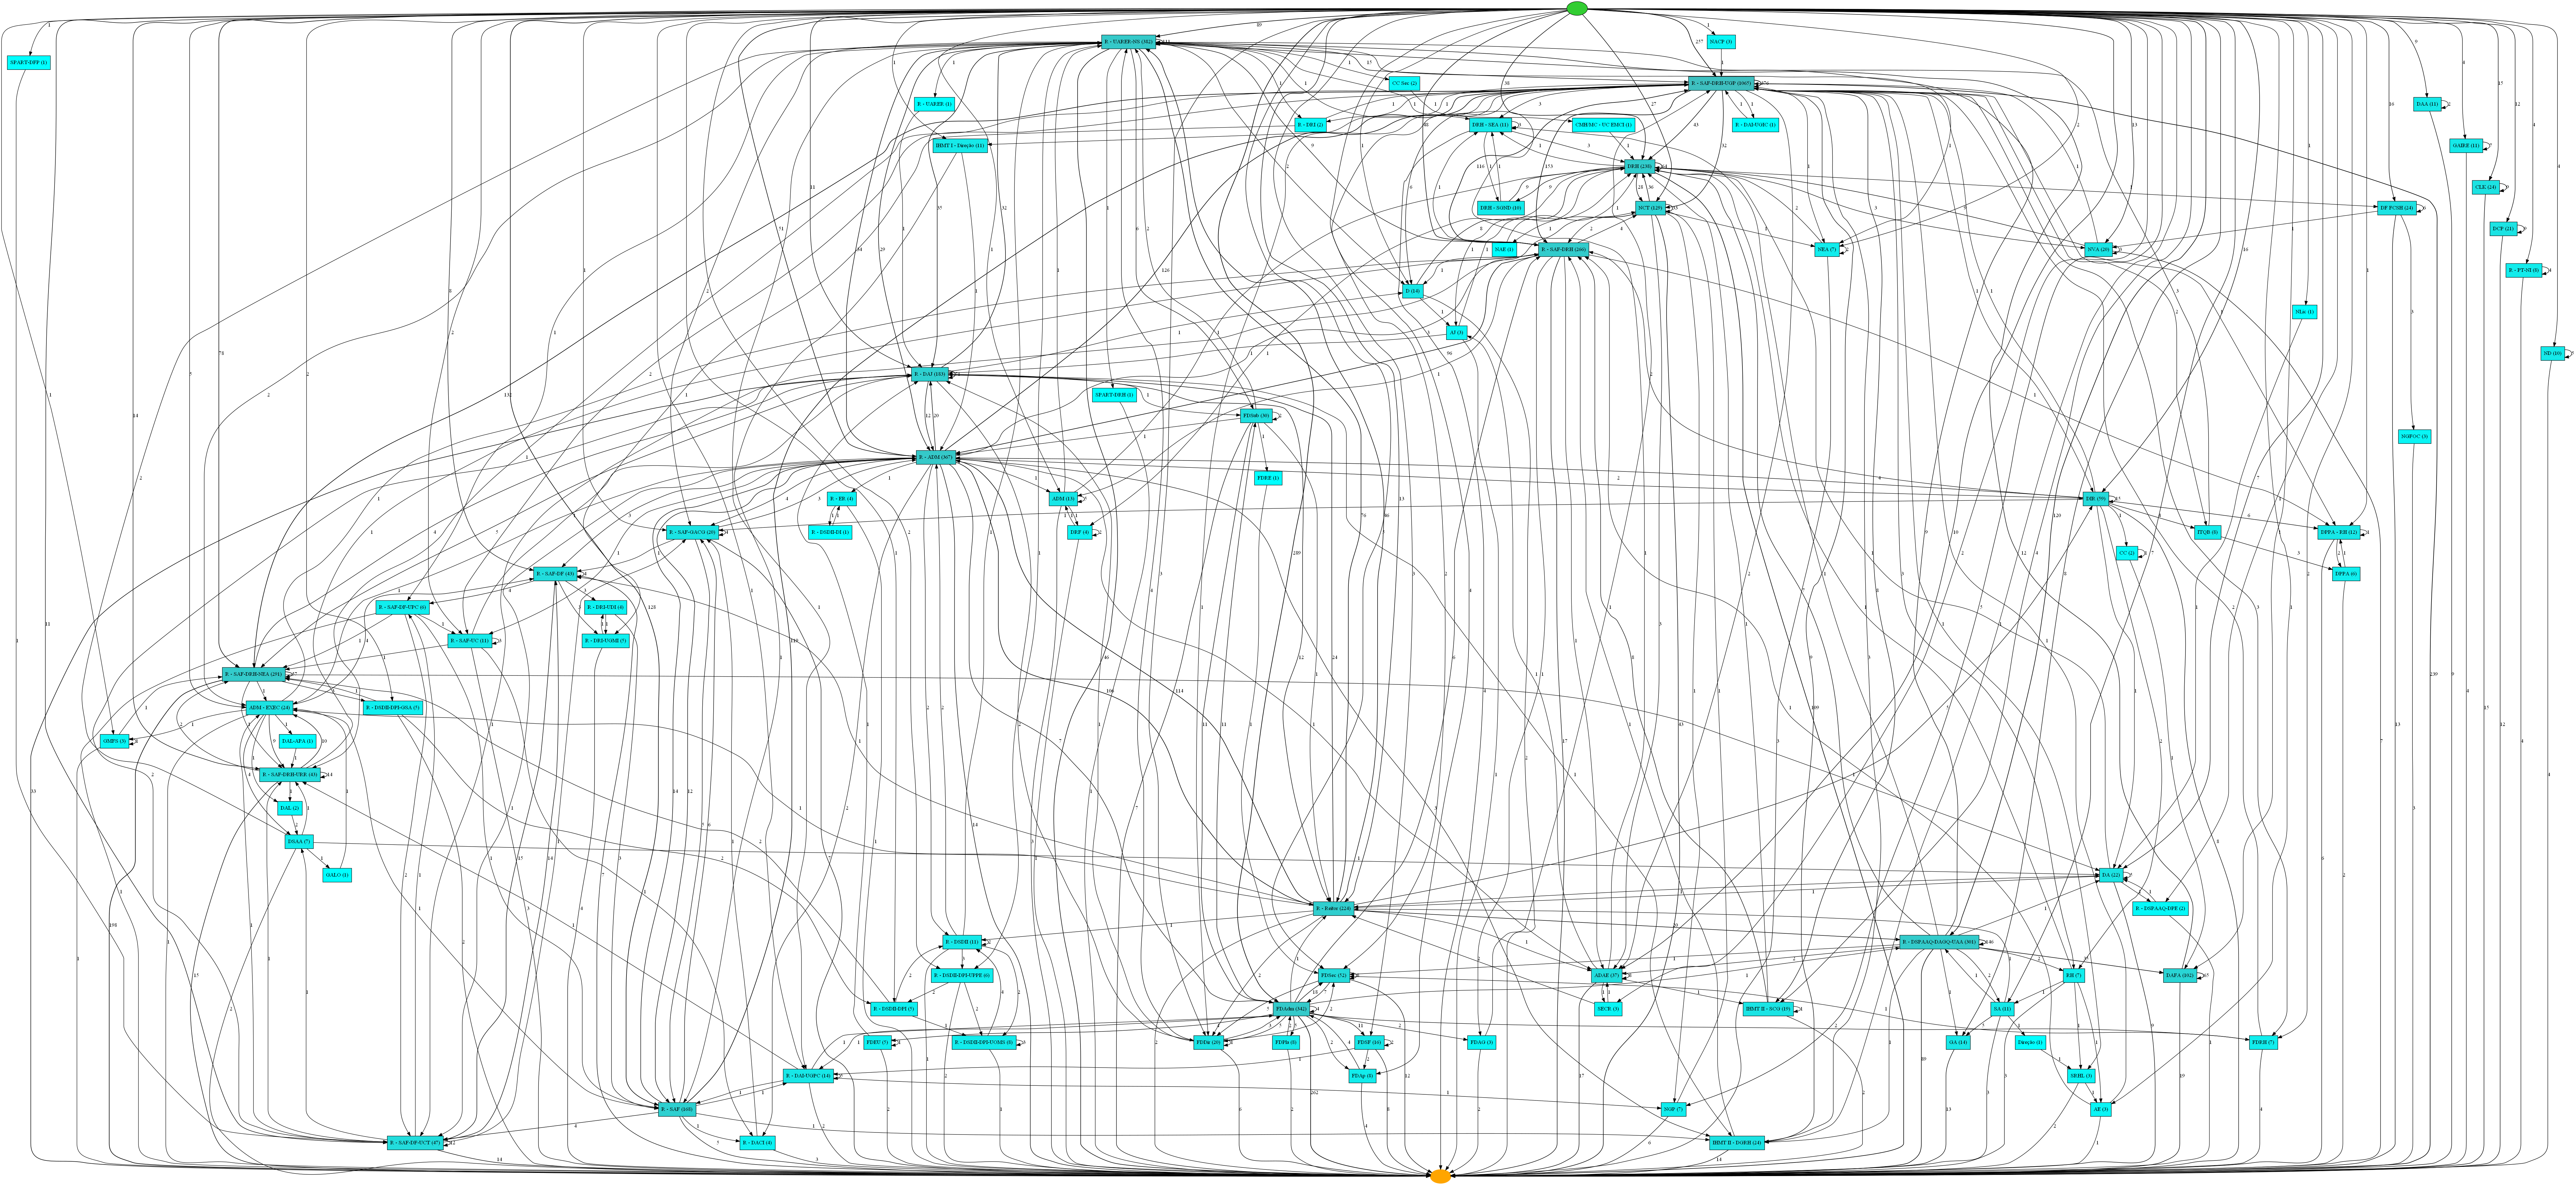

Type: Informação


In [ ]:
for t in document_types:
    print(f'Type: {t}')
    group = pm4py.format_dataframe(dataframes[t], case_id = 'GuidRegisto', activity_key = 'Destino', timestamp_key = 'DataEnvio', timest_format = '%Y-%m-%d %H:%M:%S%z')
    start_activities = pm4py.get_start_activities(group)
    end_activities = pm4py.get_end_activities(group)
    
    heu_net = heuristics_miner.apply_heu(group)

    gviz = hn_visualizer.apply(heu_net)
    hn_visualizer.view(gviz)

## Inductive miner

In [ ]:
for t in document_types:
    print(f'Type: {t}')
    group = pm4py.format_dataframe(dataframes[t], case_id = 'GuidRegisto', activity_key = 'Destino', timestamp_key = 'DataEnvio', timest_format = '%Y-%m-%d %H:%M:%S%z')
    
    process_tree = pm4py.discover_process_tree_inductive(group)
    bpmn_model = pm4py.convert_to_bpmn(process_tree)
    pm4py.view_bpmn(bpmn_model)

In [ ]:
for t in document_types:
    print(f'Type: {t}')
    group = pm4py.format_dataframe(dataframes[t], case_id = 'GuidRegisto', activity_key = 'Destino', timestamp_key = 'DataEnvio', timest_format = '%Y-%m-%d %H:%M:%S%z')

    process_tree = pm4py.discover_tree_inductive(group)
    net, initial_marking, final_marking = pt_converter.apply(process_tree)

    gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=group)
    pn_visualizer.view(gviz)

## Direct follow graph

In [ ]:
for t in document_types:
    print(f'Type: {t}')
    group = pm4py.format_dataframe(dataframes[t], case_id = 'GuidRegisto', activity_key = 'Destino', timestamp_key = 'DataEnvio', timest_format = '%Y-%m-%d %H:%M:%S%z')
    dfg, start_activities, end_activities = pm4py.discover_dfg(group)
    pm4py.view_dfg(dfg, start_activities, end_activities)

## Análise quanto ao tipo de tarefa

In [ ]:
data_tarefa = event_data.dropna()
data_tarefa

In [ ]:
data_tarefa = pm4py.format_dataframe(event_data, case_id = 'GuidRegisto', activity_key = 'TipoTarefa', timestamp_key = 'DataEnvio', timest_format = '%Y-%m-%d %H:%M:%S%z')
start_activities = pm4py.get_start_activities(formatted_data)
end_activities = pm4py.get_end_activities(formatted_data)

print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

In [ ]:
heu_net = heuristics_miner.apply_heu(data_tarefa)

gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [ ]:
#petri net equivalente
net, im, fm = heuristics_miner.apply(data_tarefa)

gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [ ]:
process_tree = pm4py.discover_tree_inductive(data_tarefa)
net, initial_marking, final_marking = pt_converter.apply(process_tree)

gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=data_tarefa)
pn_visualizer.view(gviz)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(data_tarefa)
pm4py.view_dfg(dfg, start_activities, end_activities)